<a href="https://colab.research.google.com/github/AmirGhnbr/Food-Vision/blob/dev_branch/Food_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Lets first download the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-09-24 09:24:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.45.16, 172.217.0.48, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.45.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   181MB/s    in 2.7s    

2022-09-24 09:24:48 (181 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os 

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [3]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [4]:
# get class names

import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_img = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  # return img

Image shape: (306, 512, 3)


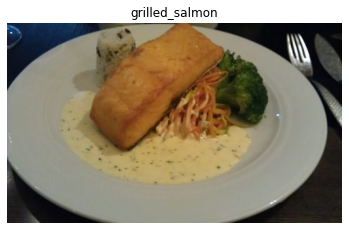

In [6]:
view_random_image(target_dir="10_food_classes_all_data/train/",
                        target_class=random.choice(class_names))

## Process the data

In [7]:
# Load data using keras utilities
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                       seed=42,
                                                       image_size=(224,224),
                                                       batch_size=32)


Found 7500 files belonging to 10 classes.


In [8]:
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                       seed=42,
                                                       image_size=(224,224),
                                                       batch_size=32)

Found 2500 files belonging to 10 classes.


## Build basic keras model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model1 = Sequential([
    tf.keras.layers.Rescaling(1/255., input_shape = (224,224,3)),
    Conv2D(16,3,activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(64, 3 , activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation= "softmax")
])

In [10]:
## Compile the model
model1.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

In [11]:
history_1 = model1.fit(train_ds, epochs=10,
                       steps_per_epoch=len(train_ds),
                       validation_data=test_ds,
                       validation_steps=len(test_ds))

Epoch 1/10
235/235 [==============================] - 32s 85ms/step - loss: 2.0927 - accuracy: 0.2391 - val_loss: 1.9143 - val_accuracy: 0.3216
Epoch 2/10
235/235 [==============================] - 20s 84ms/step - loss: 1.8254 - accuracy: 0.3663 - val_loss: 1.7970 - val_accuracy: 0.3728
Epoch 3/10
235/235 [==============================] - 19s 79ms/step - loss: 1.4625 - accuracy: 0.5071 - val_loss: 1.9155 - val_accuracy: 0.3936
Epoch 4/10
235/235 [==============================] - 20s 83ms/step - loss: 0.8983 - accuracy: 0.6973 - val_loss: 2.4623 - val_accuracy: 0.3580
Epoch 5/10
235/235 [==============================] - 19s 79ms/step - loss: 0.4164 - accuracy: 0.8660 - val_loss: 3.1549 - val_accuracy: 0.3488
Epoch 6/10
235/235 [==============================] - 19s 78ms/step - loss: 0.1975 - accuracy: 0.9387 - val_loss: 4.0163 - val_accuracy: 0.3380
Epoch 7/10
235/235 [==============================] - 19s 78ms/step - loss: 0.1321 - accuracy: 0.9620 - val_loss: 4.6592 - val_accuracy:

In [12]:
model1.evaluate(test_ds)

79/79 [==============================] - 5s 53ms/step - loss: 4.9450 - accuracy: 0.3352


[4.945013999938965, 0.3352000117301941]

In [13]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

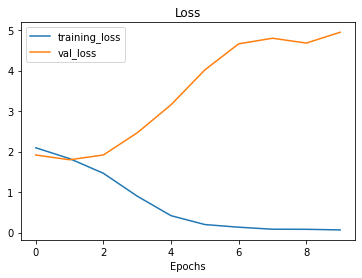

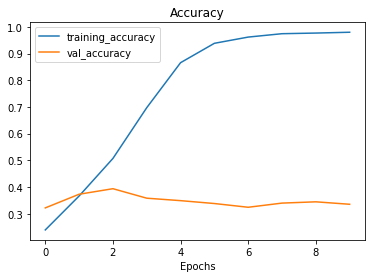

In [14]:
plot_loss_curves(history_1)

#### Validation loss is increasing means that models is overfitting the data